# Introduction

Regular expressions are text strings that describe patterns to find text or positions within a body of text. These patterns are used for four main tasks:
- To find text within a larger body of text;
- To validate that a string conforms to a desired format; 
- To replace text (or insert text at matches positions);
- to split strings.
These actions are done by a regex engine.

Regular expressions. Invented by the US Mathematician Stephen Cole Kleen in the 1950s. 

Uses:
- In HTML scraped data processing;
- ML (NLP)
- Text processing

Word characters - letters, numbers, and underscore `_`.

For regex testing: https://regex101.com/

Learn more about regex: https://www.rexegg.com/



In [ ]:
<body>
    <div>
        <h1>
            Welcome to my page!
        </h1>
        <body>
            This is the main page of my personal website.
        </body>
    </div>
</body>

Welcome to my page! 
This is the main page of my personal website.

# Operators

Operators can be:
- Greedy: match the longest possible string;
- Lazy: match the shortest possible string;


## Characters

| Operator | Meaning | Example |
| - | - | - |
| `.` (dot) | Any character except newline (line break) | `a.c` matches `abc` |
| `\` | Escaping the following special / reserved characters. | `.` (dot) is a special character, so if you want to match the dot character, you need to escape it: `a\.c` matches `a.c`.<br>`\.\*\+ \[\{\(` matches `.*+ [{(` |
| `\d` | One digit from 0 to 9 | `file_\d\d` matches `file_25` |
| `\w` | Matches word characters: ASCII/Unicode letters, digit, underscore | `\w-\w\w\w` matches `A-B_1` |
| `\W` | Matches non-word characters |
| `\s` <br>(lowercase s) | Matches whitespace character |
| `\S` <br>(uppercase s) | Matches any non-whitespace whitespace |
| `\D` | One character that is not a digit | `\D\D\D` matches `ABc` |


## Quantifiers

| Operator | Meaning | Example |
| - | - | - |
| `?` | Match 0 or 1 repetitions of preceding regexp.<br>Another function is that it makes quantifiers **lazy**. | `plurals?` matches `plurals` and `plural` |
| `+` | Match 1 or more repetitions of preceding character / regexp.<br>By default is **greedy**. | `ab+` matches `abc`, `abbc`, but NOT `ac`.<br>`Version \w-\w+` matches `Version A-b1_1`.<br>Greedy example: `\d+` matches `12345` |
| `+?` | Match 1 or more repetitions of preceding character (**lazy**) | Lazy example: `\d+` matches `1` in `12345`. |
| `*` | Match 0 or more repetitions of preceding character / regex (**greedy**) | `ab*` matches `ac`, `abc`, `abbc`.<br>Greedy example: `A*` matches `AAA` |
| `*?` | Same as `*` but **lazy** | `A*?` matches empty /nothing in `AAA` (zero repetitions). |
| `{m}` | Match exactly `m` copies of the preceding regexp | `ab{2}` matches `abb`.<br>`\D{3}` matches `ABC` |
| `{m,n}` | Match from `m` to `n` repetitions of the preceding regexp. By default it's **greedy** | `ab{2,3}` matches `abb`, `abbb`, but NOT `abbbbb`.<br>Greedy example: `\w{2,4}` matches `abcd` |
| `{m,n}?` | `m` to `n` times, **lazy** | `\w{2,4}?` matches `ab` in `abcd` |
| `{m,}` | Match `m` or more times | `ab{2,}` matches `a` followerd by at least 2 `b`s : `abb`, `abbb`, etc. |


## Logic

| Operator | Meaning | Example |
| - | - | - |
| `\|`<br>Vertical line | Alternation / OR operand; matches one of multiple patterns. | E.g. `hi\|hello`, `(m\|b\|d)ark` |
| `()` | Capturing group. These tell where to start and stop what string to extract. | |
| `?:` | Only group but do not remember the grouped part. E.g. `(i want (?:apple\|pear\|grapes))` because you only want to extract the entire string (e.g. `i want apple`) and not also the name of the fruit (e.g. `apple`)<br>Further reading: <br> https://stackoverflow.com/questions/3705842/what-does-do-in-regex <br> https://www.ocpsoft.org/tutorials/regular-expressions/or-in-regex/ <br> https://stackoverflow.com/questions/1480672/regular-expression-to-match-sentence-with-one-variable-word | |
| `\1` | contents of capturing group 1. | |



## Character classes

| Operator | Meaning | Example |
| - | - | - |
| `[]` | Indicates a choice of one of a set of characters, e.g. `[amk]`, `[a-zA-Z0-9]`<br>`[AB1-5w-z]` - one of either: `A,B,1,2,3,4,5,w,x,y,z` | |
| `[^x]` | One character that is NOT `x` | `[^a-z]{3}` - one character that is not lowercase a-z 3 times, e.g. `A1!` |


## Anchors and boundaries

| Operator | Meaning | Example |
| - | - | - |
| `^` | Match the start of a string / line.<br>*Note that inside of square brackets [], the operator `^` means negation.* | |
| `$` | Matches the end of a string / line. | |
| `\b` | Word boundary: position where only one side is an ASCII/Unicode letter, digit, or underscore; the other side is anything else or a zero-width character | 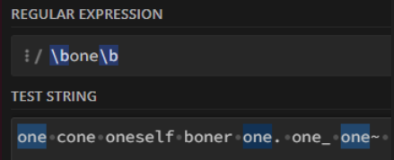 |
| `\B` | Non-word boundary | 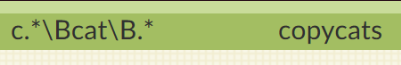 |


## Lookarounds

| Operator | Name | Function |
| - | - | - |
| `(?<=foo)` | Positive Lookbehind | Asserts that what immediately PRECEDES the current position in the string is foo |
| `(?<!foo)` | Negative Lookbehind | Asserts that what immediately PRECEDES the current position in the string is NOT foo |
| `(?=foo)` | Positive Lookahead | Asserts that what immediately FOLLOWS the current position in the string is foo |
| `(?!foo)` | Negative Lookahead | Asserts that what immediately FOLLOWS the current position in the string is NOT foo |


I want to extract `yes` if it is preceded by `strong : ` and followed by `.`

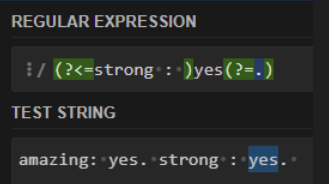

# Python `re`

> IMPORTANT! In Python `re` library, please use `r` in front of the search term if you are using advanced regexp operators!
>
> Check examples below. Also this example: `re.findall(r'\b(non)\b', 'non dairy')`

## search

Get the indices of the start and the end of the found query.

In [ ]:
import re

str1 = "I really like Shrek! I also love the other two movies."
b = re.search("\sI\s", str1)
print(b)
print(str1[20:23])

<re.Match object; span=(20, 23), match=' I '>
 I 


## findall

Find all matched strings

In [ ]:
import re

# Print a list of found queries
a = "My 2 (two) favourite 5numbers are 194 and 426"
b = re.findall( '[^a-zA-Z]([0-9]+[^a-zA-Z])' , a)
print(b)

a = "I 2 love rock 500 and roll 219 times"

b = re.findall( '[0-9]+' , a )
print(b)

['2 ', '194 ', '426']
['2', '500', '219']


In [ ]:
import re

"""
email should have the prefix that has to 
1) start with a letter and then
2) contain letters, digits, underscore, period, and/or dash,
then have the domain of "gmail.com":  
"""
str1 = "My email is andreas.kobe@gmail.com , you can use it."
re.findall('[a-zA-Z]+[a-zA-Z0-9_.-]*@gmail\.com', str1)


['andreas.kobe@gmail.com']

In [ ]:
import re

a = ['horm', 'hormon', 'hormones', 'hormonas', 'hormonal disbalance']

[ re.findall('hormon.*', i) for i in a ]


[[], ['hormon'], ['hormones'], ['hormonas'], ['hormonal disbalance']]

In [ ]:
import re

a = "ABC45 abc69"

re.findall('[a-z]+([0-9]+)', a, re.IGNORECASE)


['45', '69']

In [ ]:
import re
a = '395[1] []film[2] movies [3] another one[10]'
re.findall( '\[[0-9]*\]', a )

['[1]', '[]', '[2]', '[3]', '[10]']

In [ ]:
a = "Name: John; Surname: Doe; Age: 27; Email:john.doe@harvard.co.uk; Date: 04.04.2000; Salary: $10.00; "

# Greedy: finds the longest string match
print( re.findall('^N.+:', a) )
# Non-greedy matching: prints the first encountered match
print( re.findall('^N.+?:', a) )

# Extract email
print( re.findall('\S+@\S+', a) ) # ver1
print( re.findall('[a-zA-Z.]+@[a-zA-Z.]+', a) ) # ver2 - better
# Extract email domain
print( re.findall('Email.+@([^ ]*)', a) ) # ver1
print( re.findall('Email.+@([a-zA-Z.]+)', a) ) # ver2

# Extract pay (dollars)
print( re.findall('\$[0-9.]+', a) )

['Name: John; Surname: Doe; Age: 27; Email:john.doe@harvard.co.uk; Date: 04.04.2000; Salary:']
['Name:']
['Email:john.doe@harvard.co.uk;']
['john.doe@harvard.co.uk']
['harvard.co.uk;']
['harvard.co.uk']
['$10.00']


In [ ]:
import re

re.findall(r'\b(non)\b', 'non daily')


['non']

## replace

In [ ]:
import re
str1 = "1. mechanics finest product 2. mechanic product"
re.sub('mechanics?( finest)? product', '_', str1)

'1. _ 2. _'

In [ ]:
import re

str1 = "; red product ; no ;"
re.sub(r'\b(red?( product)? [:|;] ?not?)\b', '_', str1)

'; _ ;'

In [ ]:
import re

a = '\t\tperson1\t\t\t\tperson2\t'

re.sub('[\t]+', '_', a)

'_person1_person2_'

In [ ]:
import re

a = "'i was,, i were. now i: am not ?"

a = re.sub( '[,.?:\']', '', a )
a


'i was i were now i am not '

In [ ]:
# Remove all punctuation marks, preserving their spatial positioning
# and replacing them with a whitespace
### Explanation: replaces not (^) word characters or spaces with the empty string. 
### Be careful though, the \w matches underscore too usually for example.
import re

s = 'This is a sentence. Also this, but with a comma...'
s = re.sub(r'[^\w\s]', ' ', s)
s

'This is a sentence  Also this  but with a comma   '

In [ ]:
import re

a = "<title>Title</title><head>Header</head>"
print(f"Original: {a}")

# Greedy
a1 = re.sub( '<.*>', '<!>', a )
print(f"Greedy replacement: {a1}")

a1 = re.sub( '<.*?>', '<!>', a )
print(f"Non-greedy replacement: {a1}")


Original: <title>Title</title><head>Header</head>
Greedy replacement: <!>
Non-greedy replacement: <!>Title<!><!>Header<!>


In [ ]:
a = "Some stories:\nStory 1.[1]\nStory 2.[2]\nStory 3.[33]\nStory 4.[13325]\n"

import re

a = re.sub('\[[0-9]+\]', ';', a)

print(a)

Some stories:
Story 1.;
Story 2.;
Story 3.;
Story 4.;



In [ ]:
# Replace all numbers with a NUMBER keyword
import re

### A very difficult-looking solutions, still don't understand this complilcated regexp
re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', 'number 1 number 52 n2')
### This one is simple and makes sense
re.sub(r'[0-9]+', '__NUMBER__', 'number 1 number 52 -number22- n2')


'number __NUMBER__ number __NUMBER__ -number__NUMBER__- n__NUMBER__'

In [ ]:
import re

a = '3 (Defuncion)'
re.sub(r' *\([dDa-zA-Z ]+\s*\)\s*', '_', a)

'3_'

In [ ]:
import re

str1 = 'Catmania thiscat Catt cat thiscatmania'
re.sub(r'\bcat', '_', str1, flags=re.IGNORECASE)


'_mania thiscat _t _ thiscatmania'

## Repetitions

In [3]:
import re

a = [
    'asdf aa',
    'asdf asdf asdf asdf asdf asdf asdf asdf asdf',
    'a a a a b a a a a a '
]

# [ re.findall("^(.+\s+){10,50}", i) for i in a ]
[ re.findall("(.+\s+){10,50}", i) for i in a ]

[[], [], ['a ']]

In [ ]:
import re

a = [
    'ha',
    'hahaha',
    'ha ha ha',
    'ha ha ha ha'
]
# I want to match exactly 'ha ha ha ' 
[ re.findall(r"((?:ha ){3})", i) for i in a ]
# I want to match exactly 'ha ha ha' 
[ re.findall(r"(?:ha ){2}(?:ha)", i) for i in a ]

[[], [], ['ha ha ha'], ['ha ha ha']]

In [ ]:
import re

text1 = "I love gluten! Nothing else. Alright, let's think - so this is the gluten free bread!"
re.findall('(love|the) (gluten)', text1)

[('love', 'gluten'), ('the', 'gluten')]

In [ ]:
import re

text1 = "I love gluten. Nothing else appeals to me. gluten is the best! Not like anything else. it is gluten free : yes<br>"

# re.findall('[^.]*gluten[^.]*', text1)
';'.join( re.findall('[^.|^!|^?]*gluten[^.|^!|^?]*', text1) )

'I love gluten; gluten is the best; it is gluten free : yes<br>'

In [ ]:
text1 = "I love gluten. Nothing else appeals to me. gluten is the best! Not like anything else. here is some rubbish text <br>it is gluten free : yes<br>"

re.findall('<br>[\w\W]*gluten[\w\W]*<br>', text1)

['<br>it is gluten free : yes<br>']